<a href="https://colab.research.google.com/github/qpwisu/computer_vision/blob/master/translation%26tranlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#영상 변환
- 영상의 변환은 이동 (x축, y축 방향), 회전, 스케일 변환 등으로 이루어지며, 이를 종합적으로 표현한 affine 변환 및 perspective 변환으로 구성됨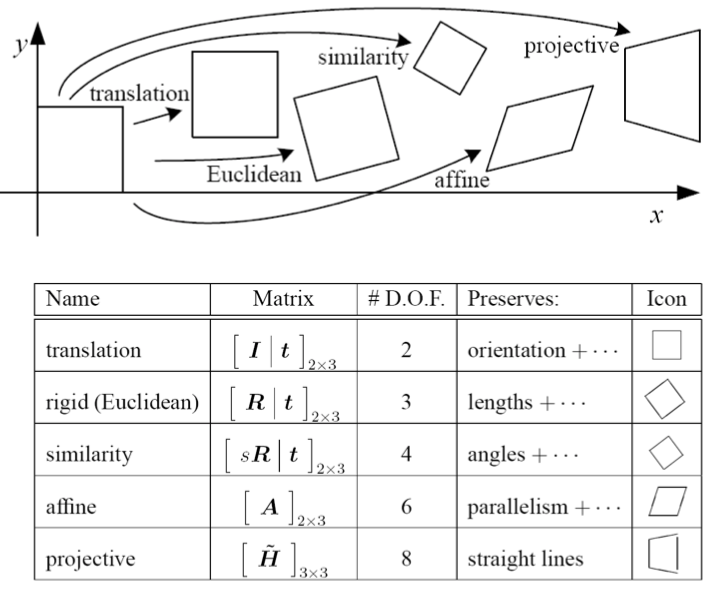

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

from keras.datasets import mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()
img = x_train[0]
height, width = img.shape
print(height, width)

11493376/11490434 [==============================] - 0s 0us/step
28 28


영상의 이동

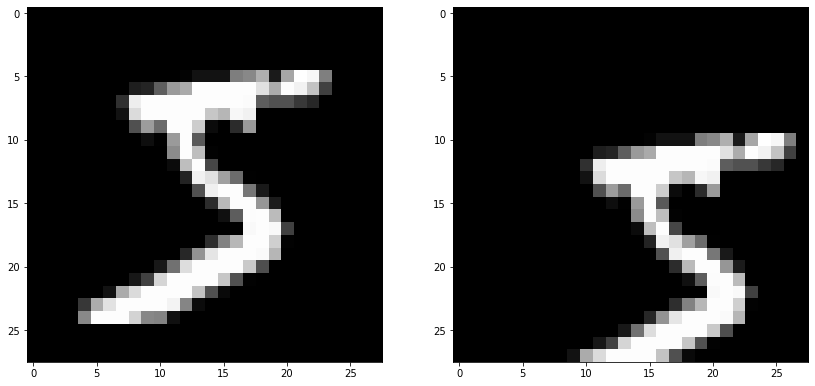

In [ ]:
translated_img = np.zeros([height,width],dtype=np.uint8) 
tx = 3
ty = 5

for i in range(height):
  for j in range(width):
    new_x = j + tx
    new_y = i + ty
    if (new_x >= 0 and new_y >= 0 and new_x < width and new_y < height):
      translated_img[new_y][new_x] = img[i][j]

plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.imshow(translated_img, cmap='gray')

plt.show()      



영상의 회전

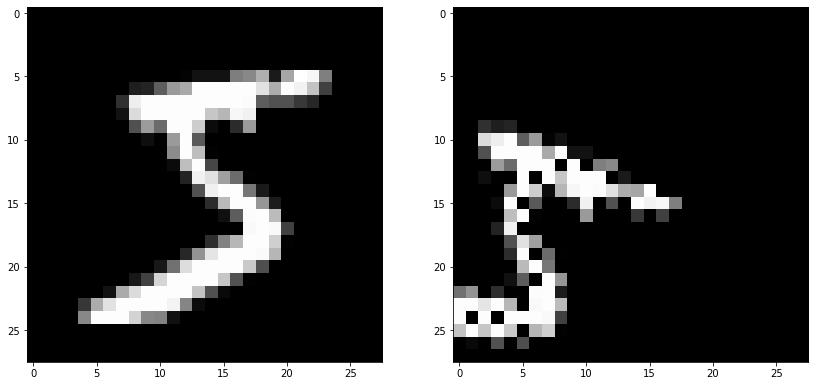

In [ ]:
translated_img = np.zeros([height,width],dtype=np.uint8) 

rotation_degree = (2*np.pi*30)/360 #30도를 라디안으로 표현 /30도 회전

rotation_matrics = [[np.cos(rotation_degree), -np.sin(rotation_degree)],[np.sin(rotation_degree), np.cos(rotation_degree)]]


for i in range(height):
  for j in range(width):
    point_array = [[j],[i]]
    calculated_array = np.matmul(rotation_matrics, point_array)
    new_x = int(calculated_array[0])
    new_y = int(calculated_array[1])
    
    if (new_x >= 0 and new_y >= 0 and new_x < width and new_y < height):
      translated_img[new_y][new_x] = img[i][j]

plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.imshow(translated_img, cmap='gray')

plt.show()      

영상의 이동과 회전을 동시에 적용

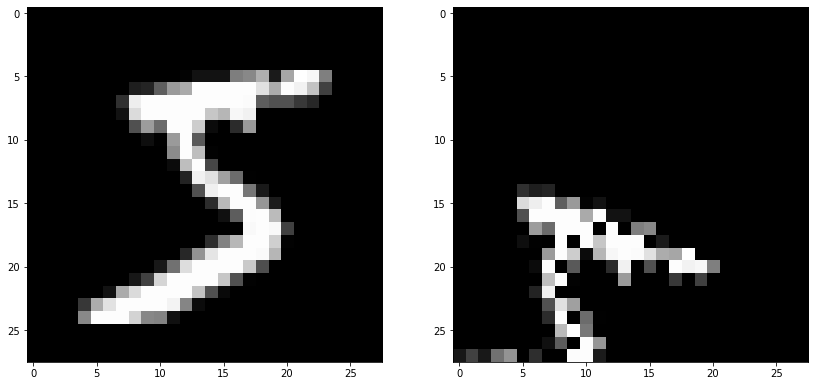

In [ ]:
translated_img = np.zeros([height,width],dtype=np.uint8) 

rotation_degree = (2*np.pi*30)/360 #30도 회전

rotation_matrics = [[np.cos(rotation_degree), -np.sin(rotation_degree)],[np.sin(rotation_degree), np.cos(rotation_degree)]]
tx = 3
ty = 5

for i in range(height):
  for j in range(width):
    point_array = [[j],[i]]
    calculated_array = np.matmul(rotation_matrics, point_array)
    new_x = int(calculated_array[0]) + tx
    new_y = int(calculated_array[1]) + ty
    
    if (new_x >= 0 and new_y >= 0 and new_x < width and new_y < height):
      translated_img[new_y][new_x] = img[i][j]

plt.figure(figsize=(14,7))

plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.imshow(translated_img, cmap='gray')

plt.show()      